# Load graph

In [ ]:
import networkx as nx
import pandas as pd
import json

edges_data = pd.read_csv('lastfm_asia_edges.csv')
labels_data = pd.read_csv('lastfm_asia_target.csv')
with open('lastfm_asia_features.json', 'r') as f:
    features_data = json.load(f)

graph = nx.Graph()

# add nodes to the graph
for node_id in labels_data['id']:
    graph.add_node(node_id)

# add labels to the graph
for _, row in labels_data.iterrows():
    node_id = row['id']
    label = row['target']
    graph.nodes[node_id]['target'] = label

# add edges to the graph
for _, edge in edges_data.iterrows():
    source = edge['node_1']
    target = edge['node_2']
    graph.add_edge(source, target)

# add features to the graph
for node_id, features in features_data.items():
    node_id = int(node_id)
    graph.nodes[node_id]['features'] = features


In [ ]:
print("number of nodes:", graph.number_of_nodes())
print("number of edges:", graph.number_of_edges())
node_id = 0
print("features of node:", graph.nodes[node_id]['features'])
print("label of node:", graph.nodes[node_id]['target'])

number of nodes: 7624
number of edges: 27806
features of node: [2964, 3900, 3902, 2402, 6185, 509, 7627, 3389, 2407, 5, 4403, 3633, 5875, 3395, 3531, 6908, 3202, 5883, 21, 7389, 1449, 5391, 3400, 2911, 6618, 3315, 1454, 4904, 3409, 3920, 6401, 3923, 4909, 2919, 532, 1463, 540, 4427, 5907, 7412, 1926, 7416, 3935, 5913, 4349, 6420, 1472, 6948, 3979, 58, 5918, 5920, 5417, 6950, 4439, 1020, 4442, 5925, 1945, 3947, 3442, 5941, 1027, 4805, 5528, 3455, 2457, 4159, 7235, 5720, 1359, 7444, 2463, 1044, 4461, 3042, 3471, 1504, 6977, 7450, 1507, 4464, 6388, 584, 6454, 585, 3479, 6455, 6986, 4893, 3154, 3482, 3483, 2477, 6041, 6731, 1138, 2977, 6468, 3993, 2006, 7366, 7005, 602, 3998, 2991, 5460, 7009, 7010, 3500, 2499, 6736, 6367, 5464, 7014, 4990, 7016, 2999, 1530, 4500, 1075, 338, 5468, 1533, 1078, 2541, 7024, 6635, 3523, 4019, 2024, 4081, 498, 5011, 3069, 3530, 4025, 1549, 133, 7037, 3533, 1552, 5489, 2533, 2581, 5025, 4374, 7569, 4383, 4262, 146, 5037, 2055, 5649, 5502, 661, 32, 4041, 667, 753

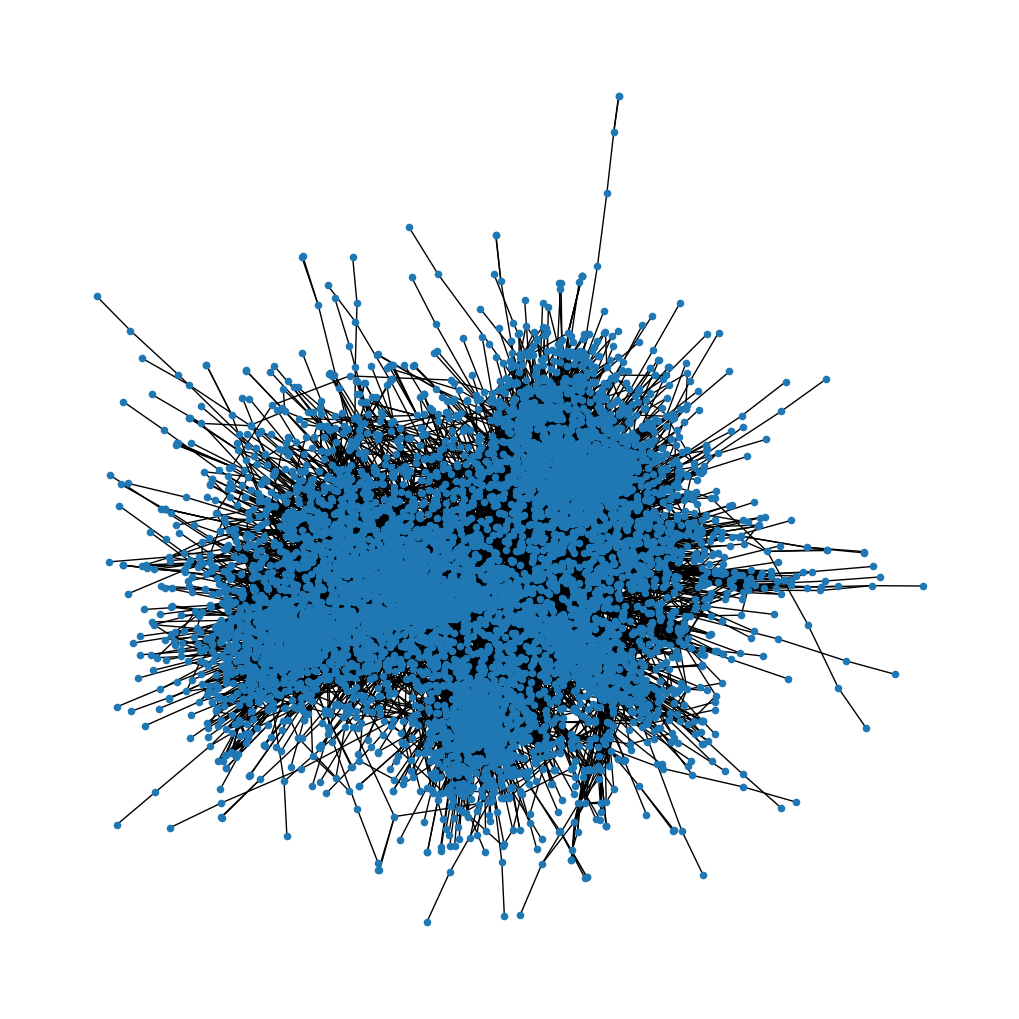

In [ ]:
import matplotlib.pyplot as plt

# draw the graph
plt.figure(figsize=(10, 10))
nx.draw(graph, with_labels=False, node_size=20)
plt.show()

# Analysis Data

## Degree Distribution

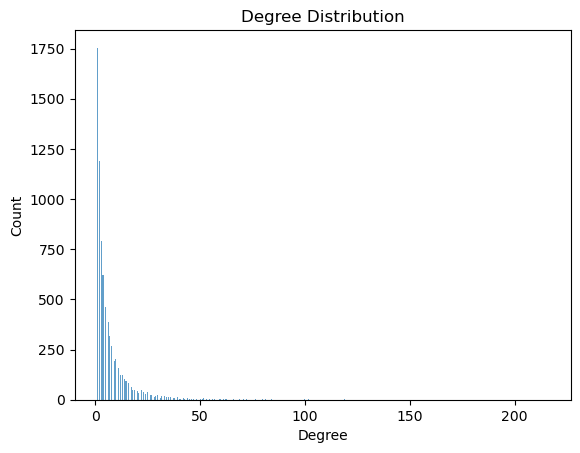

mean degree: 7.2943336831059815
max degree: 216
min degree: 1


In [ ]:
# get the degree of each node
degree_sequence = [graph.degree(node) for node in graph.nodes()]

# draw the degree distribution
plt.hist(degree_sequence, bins='auto', alpha=0.7, rwidth=0.85)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.show()

# calculate the mean, max, and min degree
mean_degree = sum(degree_sequence) / len(degree_sequence)
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
print("mean degree:", mean_degree)
print("max degree:", max_degree)
print("min degree:", min_degree)

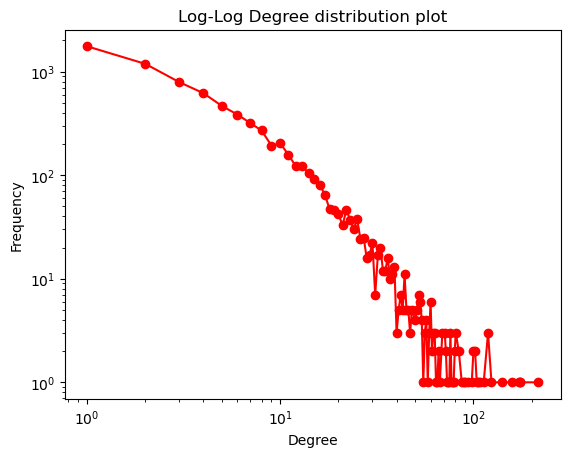

In [ ]:
import numpy as np
import collections

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

deg = np.array(deg)
cnt = np.array(cnt)

# draw the log-log degree distribution
plt.loglog(deg, cnt, 'r-', marker='o')
plt.title("Log-Log Degree distribution plot")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Path Length

In [ ]:
import networkx as nx

average_shortest_path_length = nx.average_shortest_path_length(graph)
diameter = nx.diameter(graph)

print("Average shortest path length:", average_shortest_path_length)
print("Diameter:", diameter)

Average shortest path length: 5.232237268915701
Diameter: 15


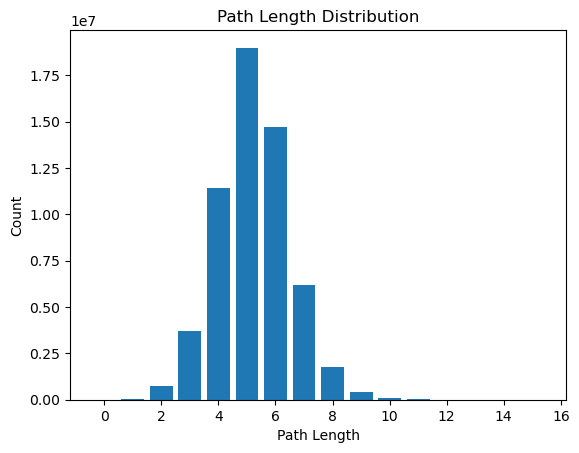

In [ ]:
# calculate the shortest path length between all pairs of nodes
all_shortest_paths = nx.all_pairs_shortest_path_length(graph)

# count the frequency of each path length
path_length_counts = {}
for source, paths in all_shortest_paths:
    for target, path_length in paths.items():
        if path_length not in path_length_counts:
            path_length_counts[path_length] = 0
        path_length_counts[path_length] += 1

# draw the path length distribution
x = list(path_length_counts.keys())
y = list(path_length_counts.values())
plt.bar(x, y)
plt.xlabel('Path Length')
plt.ylabel('Count')
plt.title('Path Length Distribution')
plt.show()

## Clustering Coefficient

Average clustering coefficient: 0.21941842432708525


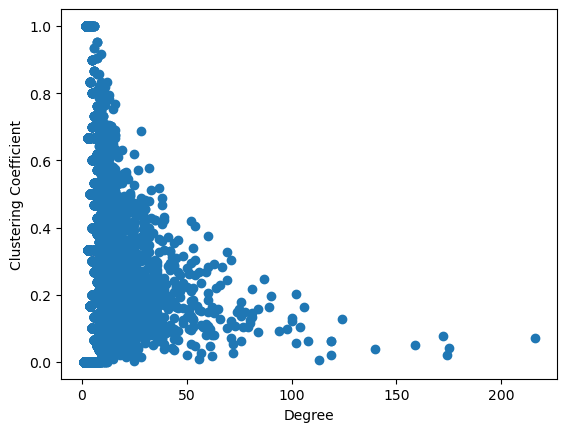

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# calculate the clustering coefficient of each node
clustering_coefficients = nx.clustering(graph)

# calculate the average clustering coefficient
average_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print("Average clustering coefficient:", average_clustering_coefficient)

# get the degree and clustering coefficient of each node
degrees = [graph.degree(n) for n in graph.nodes()]
clustering_coefficients = [clustering_coefficients[n] for n in graph.nodes()]

# draw the degree and clustering coefficient
plt.scatter(degrees, clustering_coefficients)
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.show()

## Centrality

### Degree Centrality

在核密度估计（KDE）图中，"Density"（密度）表示的是概率密度。这并不是直接的概率，而是一个表示数据在各个值上分布密度的度量。

在 KDE 图中，x轴表示数据的值，y轴（标记为 "Density"）表示对应值的概率密度。如果 KDE 图的某个部分比其他部分更高，那么就更有可能在那个部分的 x 值附近找到数据点。

总的来说，"Density" 是一个表示数据分布形状的度量，它可以帮助我们理解数据点在哪些值上更集中，哪些值上更分散。

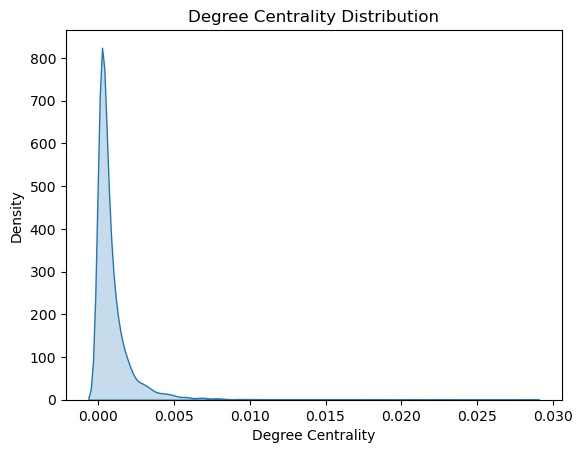

In [ ]:
import seaborn as sns
centrality = nx.degree_centrality(graph)

cent_values = list(centrality.values())

sns.kdeplot(cent_values, fill=True)

plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Density')
plt.show()

### Closeness Centrality

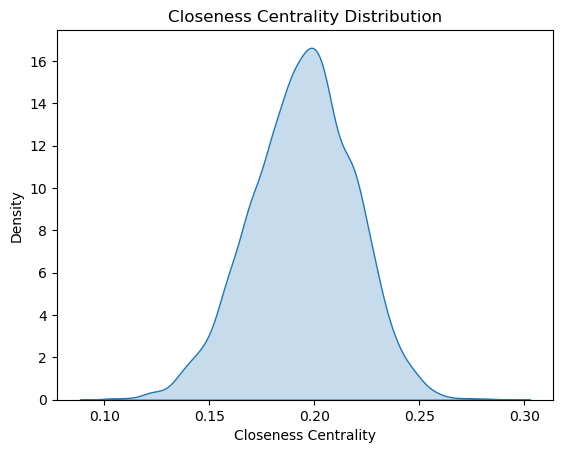

In [ ]:
centrality = nx.closeness_centrality(graph)
cent_values = list(centrality.values())

sns.kdeplot(cent_values, fill=True)

plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Density')

plt.show()

### Betweenness Centrality

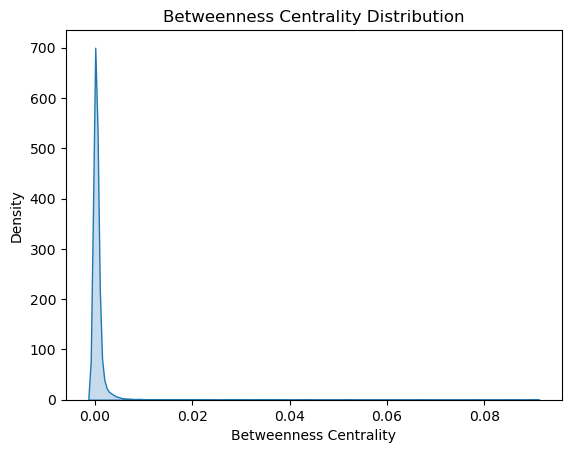

In [ ]:
centrality = nx.betweenness_centrality(graph)
cent_values = list(centrality.values())

sns.kdeplot(cent_values, fill=True)

plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Density')
plt.show()


### Eigenvector Centrality

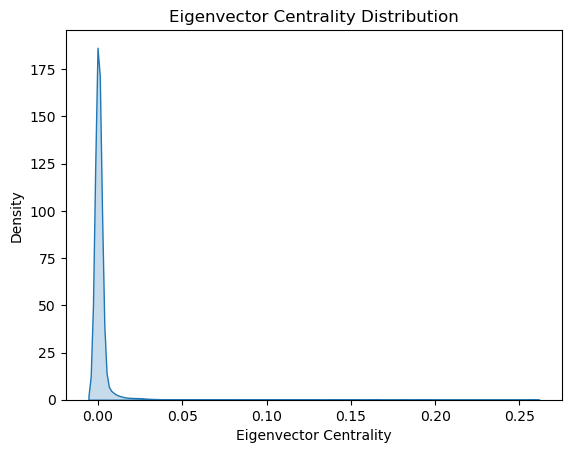

In [ ]:
centrality = nx.eigenvector_centrality(graph)
cent_values = list(centrality.values())

sns.kdeplot(cent_values, fill=True)

plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Density')
plt.show()

### Freeman Centrality

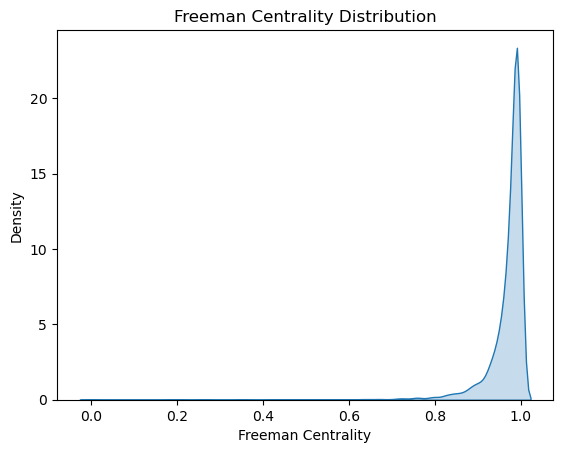

In [ ]:
degree_centrality = nx.degree_centrality(graph)
N = len(graph.nodes())
freeman_centrality = {}
for node, degree in degree_centrality.items():
    freeman_centrality[node] = (N-1) / (N-2) * (1 - degree / max(degree_centrality.values()))

cent_values = list(freeman_centrality.values())
sns.kdeplot(cent_values, fill=True)

plt.title('Freeman Centrality Distribution')
plt.xlabel('Freeman Centrality')
plt.ylabel('Density')

plt.show()

## Multinominal Node Classification

# Community Detection

### Girvan-Newman
时间复杂度是O(n^3)，跑了679m直接放弃

基于分裂的社区检测技术

In [ ]:
communities = list(nx.community.girvan_newman(graph))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/xielinni/yes/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/jq/210sj049661c55kmz_vfqhkm0000gn/T/ipykernel_48957/1759372869.py", line 1, in <module>
    communities = list(nx.community.girvan_newman(graph))
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/xielinni/yes/lib/python3.11/site-packages/networkx/algorithms/community/centrality.py", line 147, in girvan_newman
    yield _without_most_central_edges(g, most_valuable_edge)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/xielinni/yes/lib/python3.11/site-packages/networkx/algorithms/community/centrality.py", line 166, in _without_most_central_edges
    edge = most_valuable_edge(G)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/xielinni/yes/lib/python3.11/site-packages/networkx/algorithms/community/centrality.py", line 1

In [ ]:
# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

### Louvain Algorithm
仅基于网络结构进行社区检测

基于模块化优化的社区检测技术   贪婪算法


时间复杂度是O(nlogn)

In [ ]:
#基于networkx的Louvain社区检测
communities =nx.community.louvain_communities(graph)
communities = list(communities)
num_communities = len(communities)
print("Number of communities:", num_communities)
#计算模块度
modularity = nx.community.modularity(graph, communities)
print("Modularity:", modularity)

Number of communities: 28
Modularity: 0.8137205528047778


In [ ]:
# 基于python-louvain库的社区检测
# pip install python-louvain
# conda install -c conda-forge python-louvain

import community as community_louvain

partition = community_louvain.best_partition(graph)

# 计算社区的数量
num_communities = len(set(partition.values()))

print("Number of communities: ", num_communities)

# 计算模块度
modularity = community_louvain.modularity(partition, graph)

print("Modularity: ", modularity)

Number of communities:  28
Modularity:  0.8138949237270685


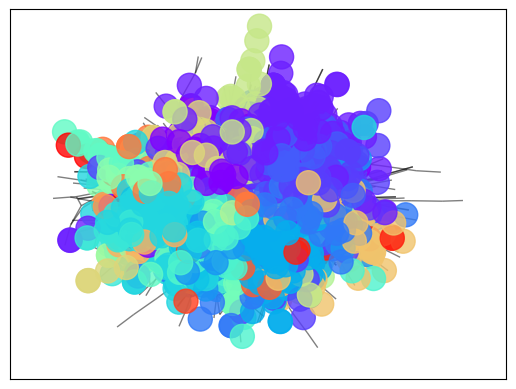

In [ ]:
import matplotlib.cm as cm

# 创建一个颜色映射
colors = cm.rainbow(np.linspace(0, 1, num_communities))

# 绘制节点，使用颜色映射
nx.draw_networkx_nodes(graph, pos=nx.spring_layout(graph),
                       node_color=[colors[partition[node]] for node in graph.nodes],
                       alpha=0.8)

# 绘制边
nx.draw_networkx_edges(graph, pos=nx.spring_layout(graph), alpha=0.5)

plt.show()

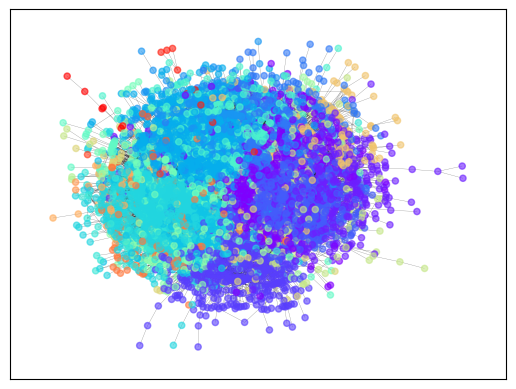

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm

# 创建一个颜色映射
colors = cm.rainbow(np.linspace(0, 1, num_communities))

# 使用Kamada-Kawai布局算法
pos = nx.kamada_kawai_layout(graph)

# 绘制节点，使用颜色映射，减小节点大小，增加透明度
nx.draw_networkx_nodes(graph, pos,
                       node_color=[colors[partition[node]] for node in graph.nodes],
                       node_size=20,
                       alpha=0.6)

# 绘制边，减小边的大小，增加透明度
nx.draw_networkx_edges(graph, pos, width=0.2, alpha=0.5)

plt.show()

###